In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.spatial.distance import cdist

## import the library below:

In [3]:
from PyEyeSim import EyeData


In [4]:
%load_ext autoreload
%autoreload 2

## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [5]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'FixDatUrban.csv'
FixData=pd.read_csv(FilePath)
print(np.shape(FixData))


(29324, 17)


In [6]:
FixData=FixData[FixData.age>0]

## Step 2

#### pass pandas dataframe, to pyeyesim, providing information on screen size in pixels

(we run the pipeline here because this nb is to demonstrate the inference pipeline not the descriptives)


dataset size:  (21165, 17)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 40 subjects, and 64 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
1.0
stimulus size in y is full screen
stimulus size in x full screen
 
2.0
stimulus size in y is full screen
stimulus size in x full screen
 
3.0
stimulus size in y is full screen
stimulus size in x full screen
 
4.0
stimulus size in y is full screen
stimulus size in x full screen
 
5.0
stimulus size in y is full screen
stimulus size in x full screen
 
6.0
stimulus size in y is full screen
stimulus size in x full screen
 
7.0
stimulus size in y is full screen
stimulus size in x f

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
        45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
        58.]))

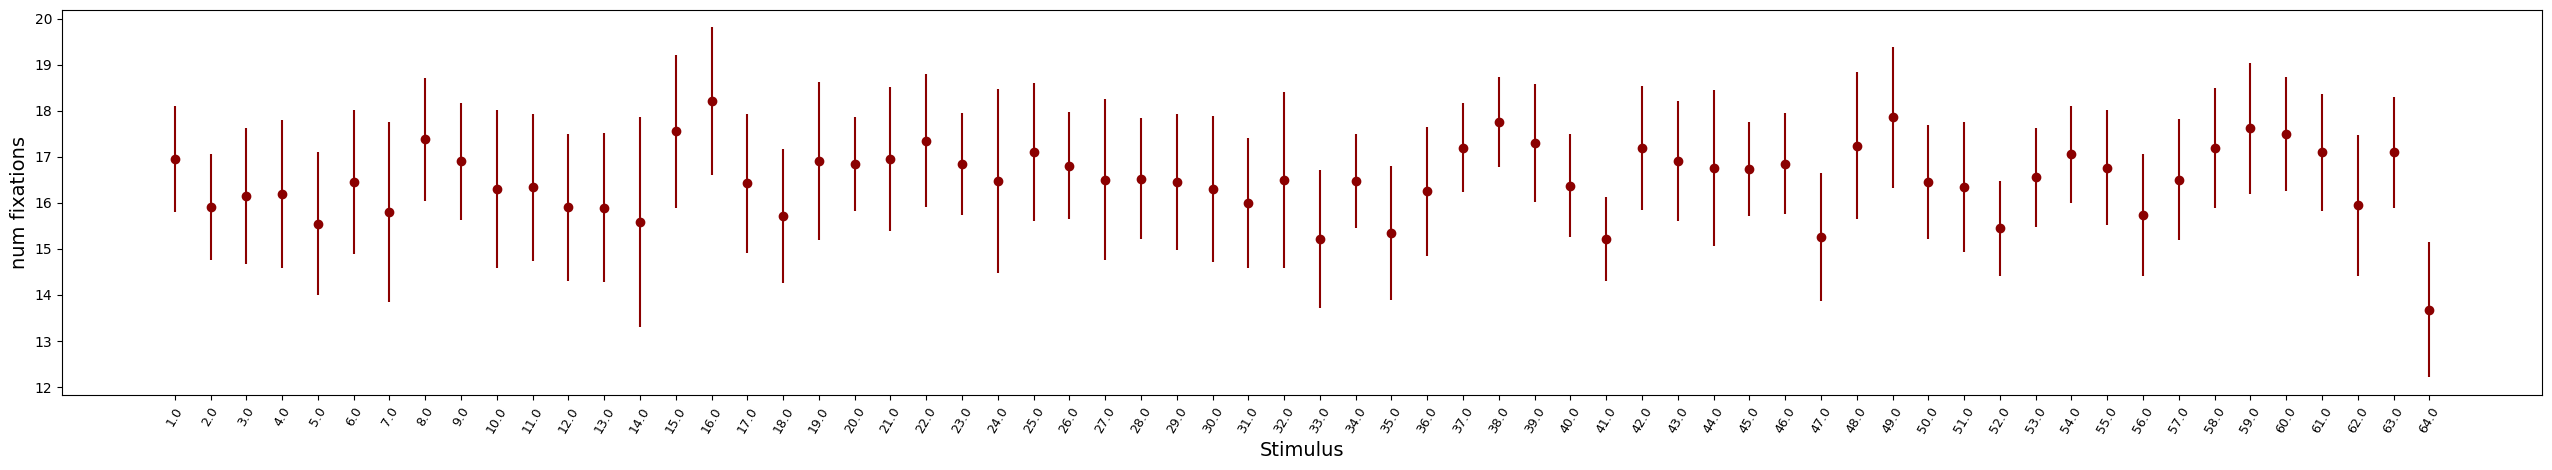

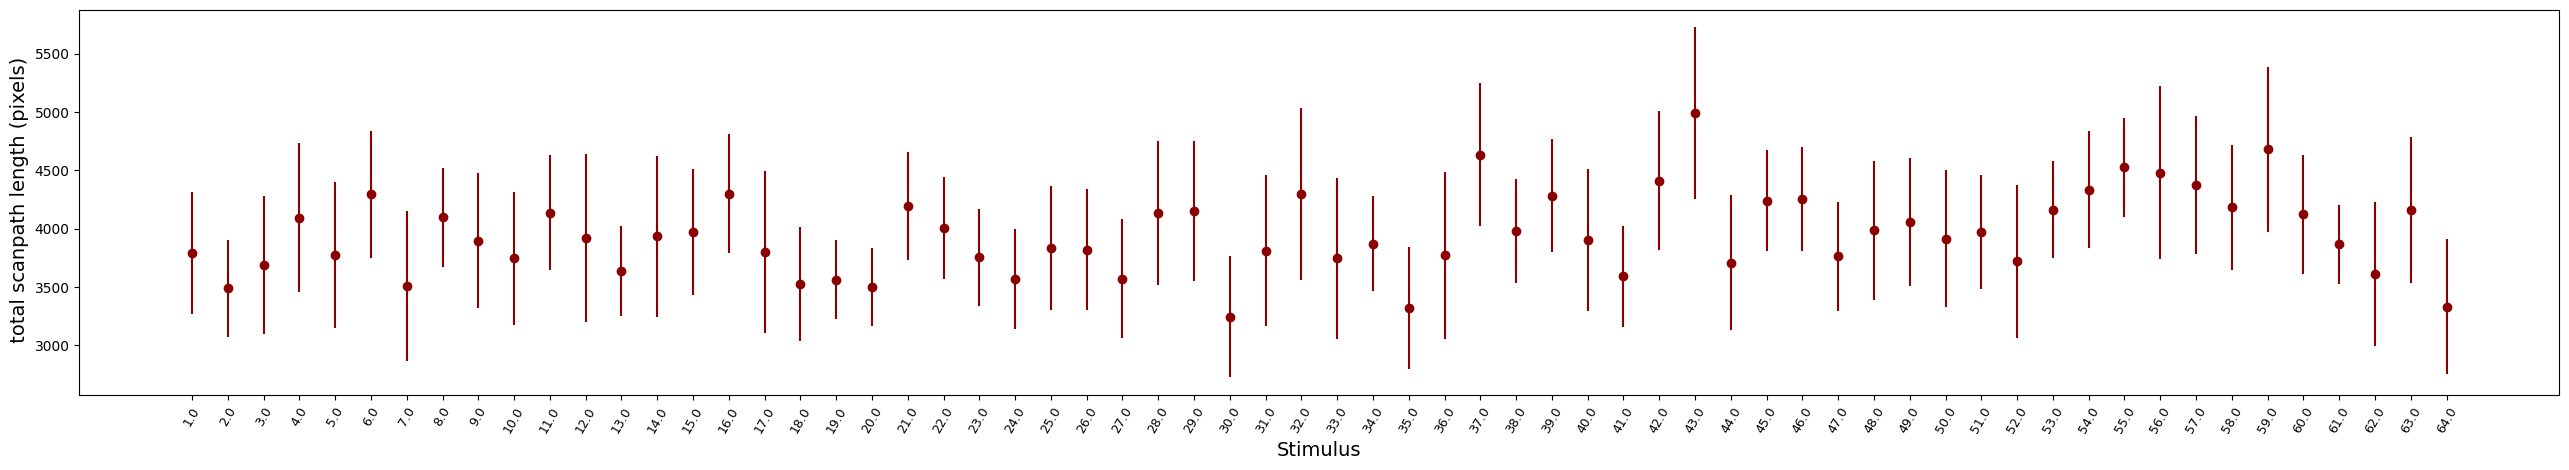

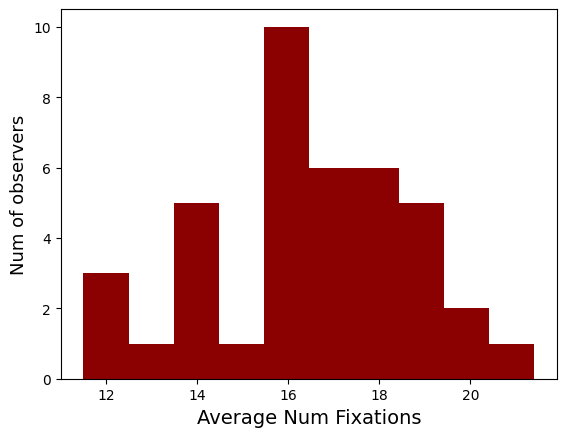

In [7]:

sizeX,sizeY=1280,960


UrbanDat=EyeData(FixData,sizeX,sizeY)
UrbanDat.DataInfo(FixDuration='length',Stimulus='filenumber',subjectID='SUBJECTINDEX',StimPath=Path+'8/',StimExt='.png')
UrbanDat.RunDescriptiveFix(Visual=1)


We test the the Hidden Markov Model (HMM) compering the pairwaize likelihood of the model with all the stimuli, in order to validate the algorithm.

We create a two matrix of size (n_stimuli, n_stimuli) where each element is the likelihood of the model. We fit the model using train data and then we compute the likelihood of the model for each stimuli in the train and test data.

We put a red dot in corrispondence of the value with the highest likelihood for each stimuli in the test data.

We expect that the red dot is in the diagonal of the matrix, this means that the model is able to predict better the stimuli that it has seen during the training, and in the test data the model is able to predict better data that are similar to the train data.

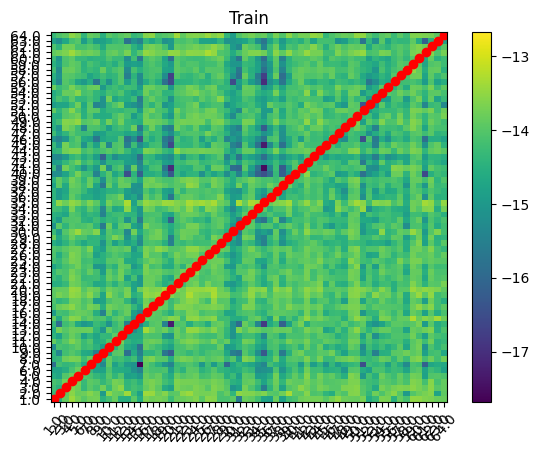

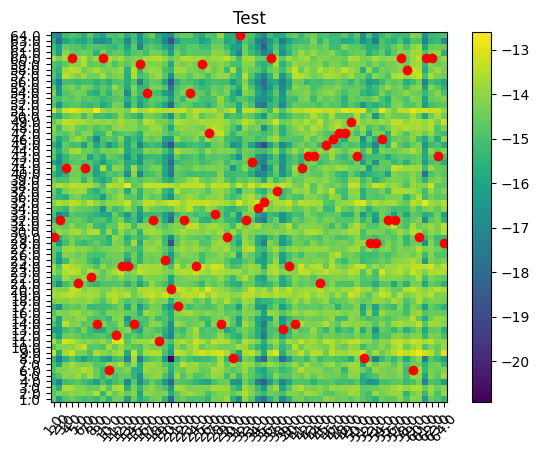

In [169]:
S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=7, ntest=3)

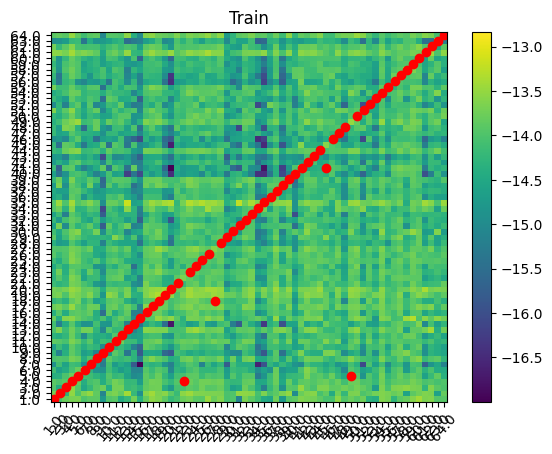

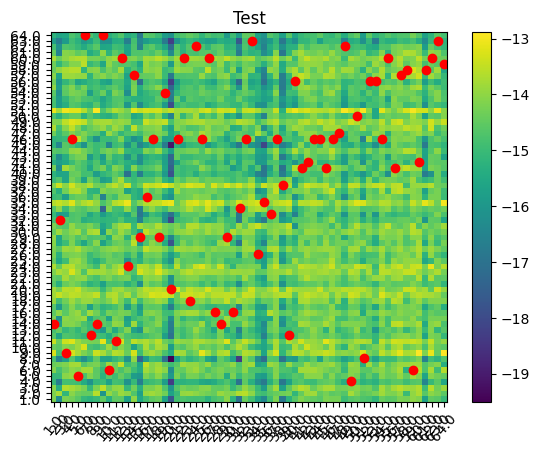

In [170]:
S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=4, ntest=3)

In the beginning we can see that the model works good with the training data, but is not able to predict correctly the stimuli in the test data, this could be mainly for the amount of data that we train the model.

As seen in previous analysis, we can increase the performance of the result by increasing the number of iteration (repetition of fitting process on the same data) and giving more possilbe number of components, taking in the end only the best model resulting from the fitting process.

Model is not converging.  Current: -4241.830216615299 is not greater than -4231.966548187555. Delta is -9.863668427743505
Model is not converging.  Current: -3978.3496280692875 is not greater than -3975.848814781325. Delta is -2.500813287962501


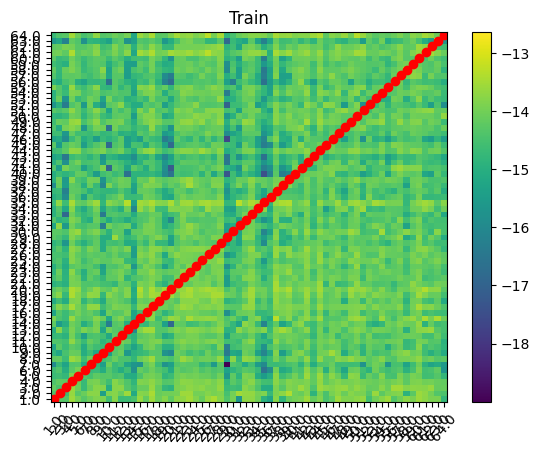

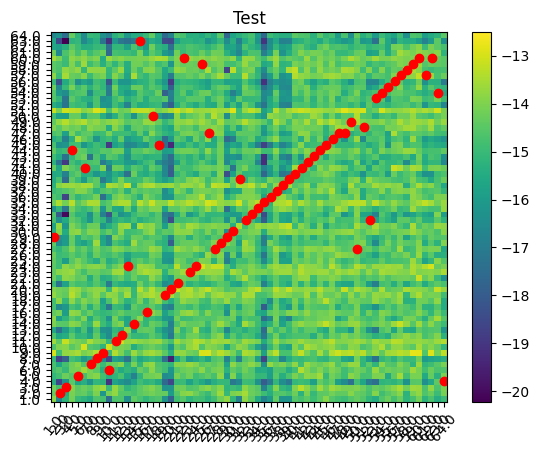

In [243]:
# Computation time is too long for this one 77 minutes with i7-10870H 16GB RAM
#S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[3,4,5,6,7], ntest=3, iter=10)

# Uncomment this one to try with less stimuli
#S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[3,4,5,6,7], ntest=3, iter=10, stimuli=[1,2,3,4,5,6,7,8,9,10])

Model is not converging.  Current: -4234.5790769749165 is not greater than -4231.104119904493. Delta is -3.474957070423443
Model is not converging.  Current: -3760.0921723881397 is not greater than -3756.452458042627. Delta is -3.639714345512857
Model is not converging.  Current: -3846.6836310342733 is not greater than -3835.9478261339923. Delta is -10.735804900280982


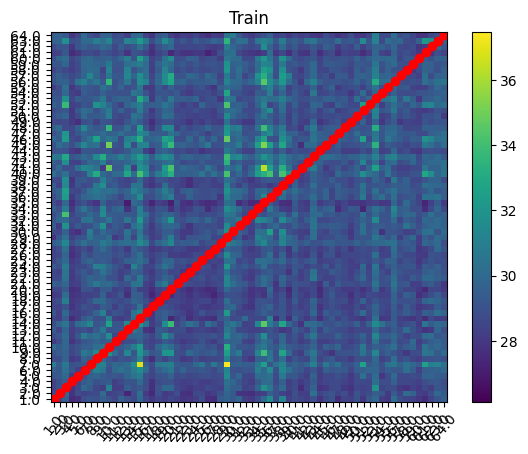

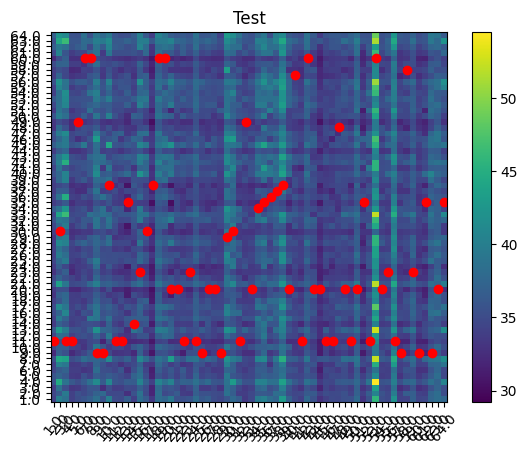

In [ ]:
# Computation time is too long for this one 77 minutes with i7-10870H 16GB RAM
#S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[3,4,5,6,7], ntest=3, iter=10, bic=True)

The final result fits better with the expectation, the red dot in the training and test data are mostly in the diagonal of the matrix.

The model after fit 10 times with 5 different number of components is able to predict better stimuli in the same distribution of the train data.

As previously studied, increasing the number of iteration will lead to a better result, but this is computationally expensive.

Now we will try a similar approach to test and evaluate the matricies dissimilarity measure proposed in the PyEyeSimInferenceDemo2.ipynb

In this case we consider two models, every iteration we fit the first model with the train data of one stimulus and the second model with the train data of another stimulus, then we compute the dissimilarity measure between the two models.

We expect that the dissimilarity measure il the lowest when the two stimuli are identical, ie the diagonal of the matrix.

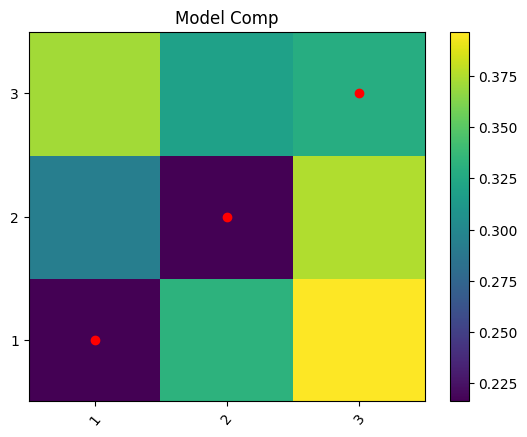

In [19]:
S = UrbanDat.HMMSimPiepelineModel2Model(ncomp=[3,4,5], iter=20, stimuli=[1,2,3])

In [16]:
# Select 10 random stimuli
stim = np.random.choice(UrbanDat.stimuli, 10, replace=False)
stim = [int(s) for s in stim]

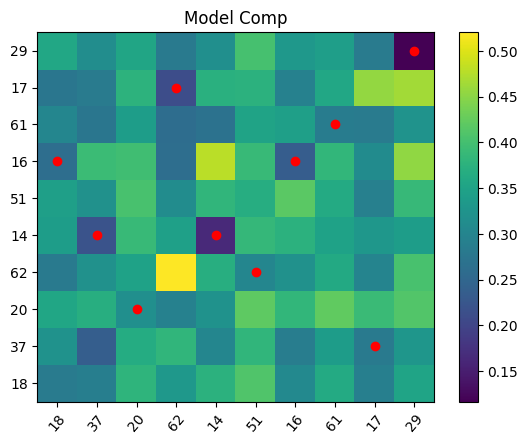

In [18]:
S = UrbanDat.HMMSimPiepelineModel2Model(ncomp=[3,4,5], iter=20, stimuli=stim)

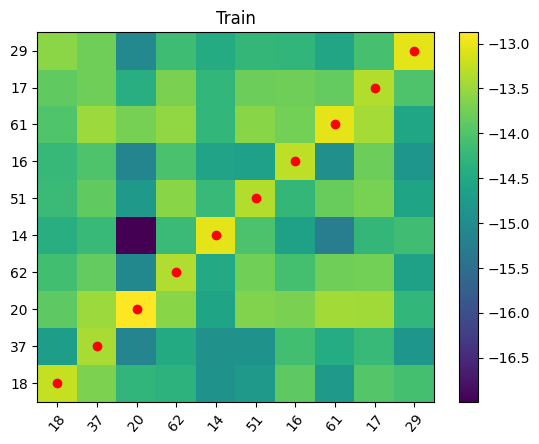

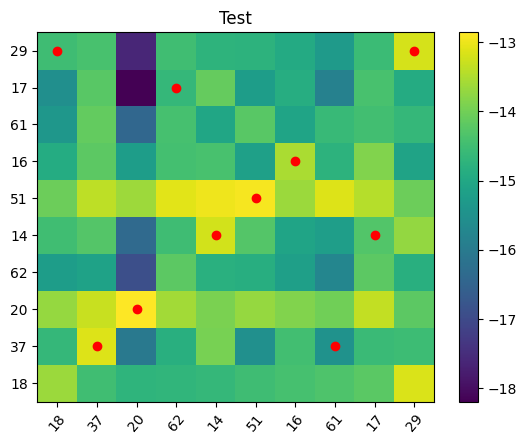

In [8]:
S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[3,4,5], iter=10, stimuli=stim)

Model is not converging.  Current: -4168.231012918618 is not greater than -4168.095731368882. Delta is -0.13528154973573692
Model is not converging.  Current: -4036.68964601756 is not greater than -4031.9209758800616. Delta is -4.768670137498248


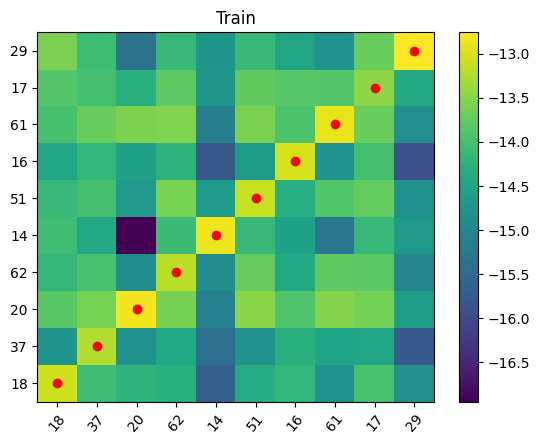

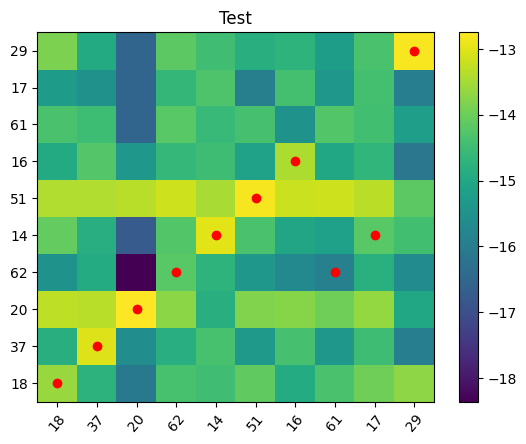

In [14]:
S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[2,3,4,5,6,7], iter=20, stimuli=stim)

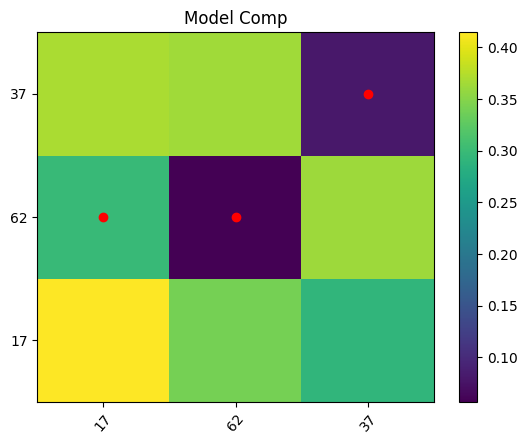

In [20]:
S = UrbanDat.HMMSimPiepelineModel2Model(ncomp=[3,4,5], iter=20, stimuli=[17,62,37])

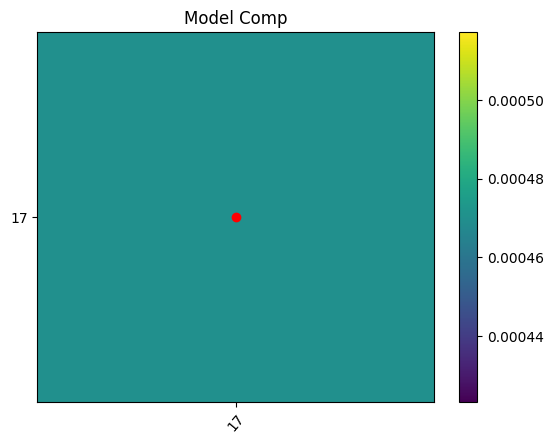

In [26]:
S = UrbanDat.HMMSimPiepelineModel2Model(ncomp=[2,3,4,5,6,7], iter=100, stimuli=[17])

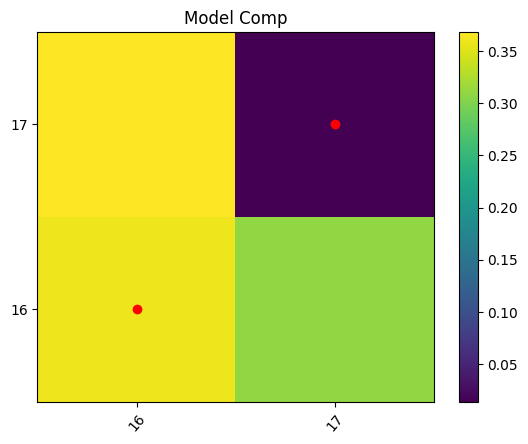

In [28]:
S = UrbanDat.HMMSimPiepelineModel2Model(ncomp=[2,3,4,5,6,7], iter=100, stimuli=[16,17])

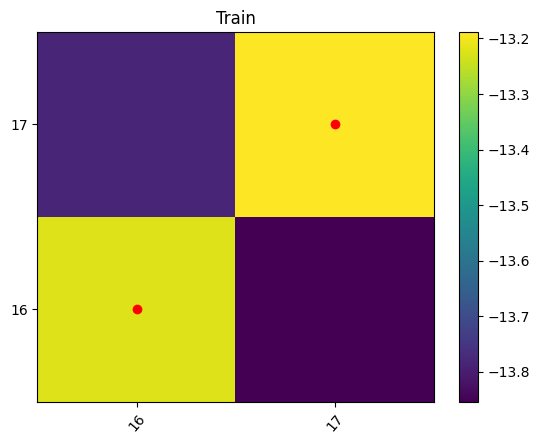

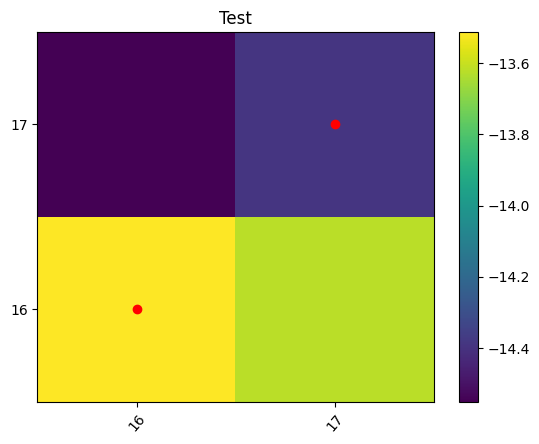

In [9]:
S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[2,3,4,5,6,7], iter=10, stimuli=[16,17])

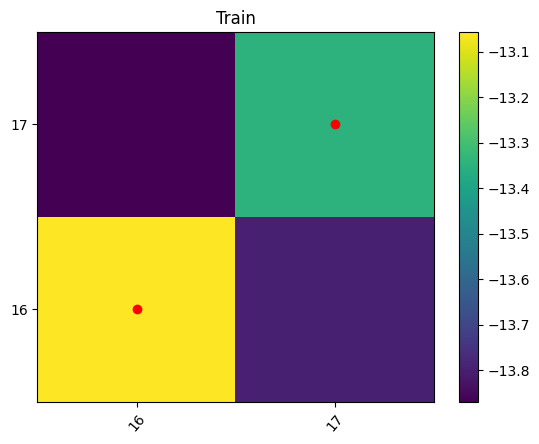

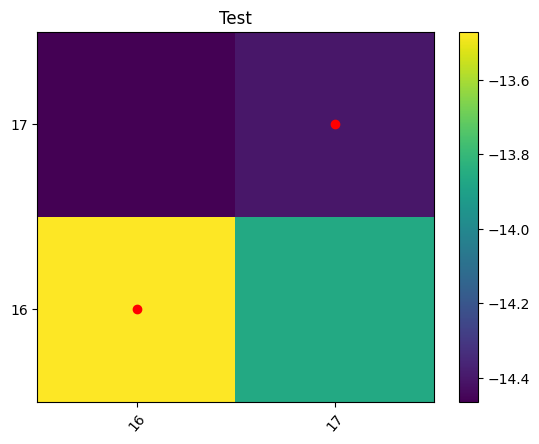

In [10]:
S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[2,3,4,5,6,7], iter=10, stimuli=[16,17])

These results are consistent with the expectation, even if it seems more important to increase the number of iteration compared to the likelihood measure.

Comparing the two method is possible to notice that the performance of the likelihood method is favourite compared to matricies dissimilarity measure, since with the traing data we obtain a more stable and computatiloannly efficent result.

We can take in consideration just the result with the training data, since also in the model2model method are used the same dataset to fit the two models.

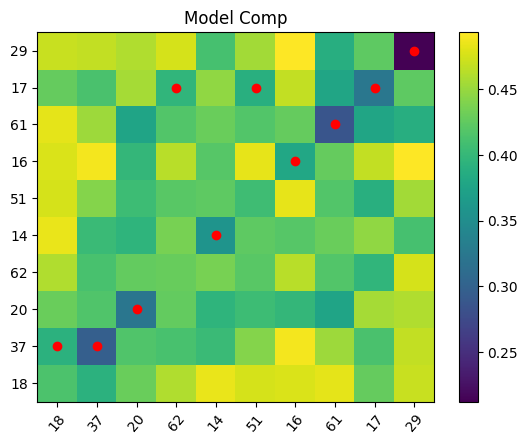

In [ ]:
S = UrbanDat.HMMSimPiepelineModel2ModelOpt(ncomp=[2,3,4,5,6,7], iter=20, stimuli=stim)

## Subject with Subject

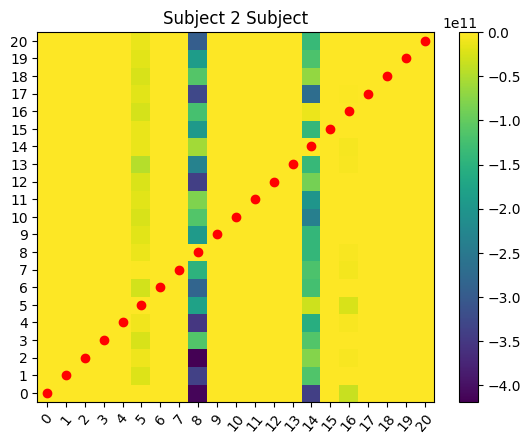

In [78]:
S = UrbanDat.HMMSimPipelineSubject2Subject(ncomp=[2,3,4,5,6,7,8,9,10], iter=1, stim=1)

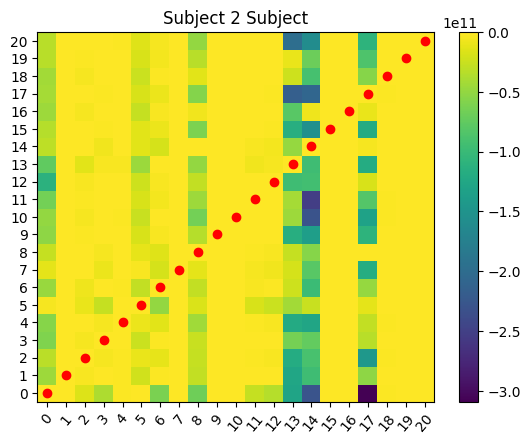

In [79]:
S = UrbanDat.HMMSimPipelineSubject2Subject(ncomp=[2,3,4,5,6,7,8,9,10], iter=10, stim=1)

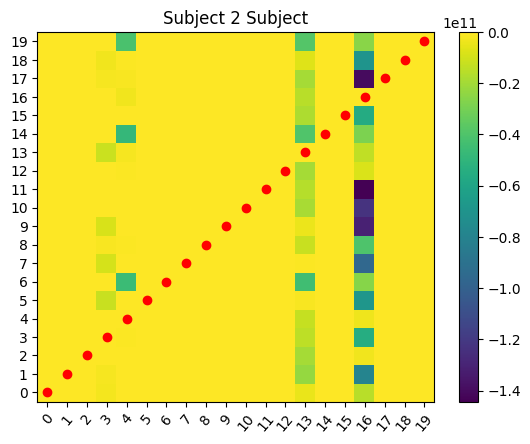

In [80]:
S = UrbanDat.HMMSimPipelineSubject2Subject(ncomp=[2,3,4,5,6,7,8,9,10], stim=2)

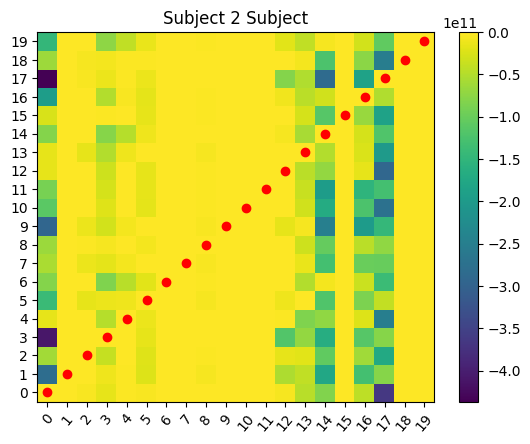

In [81]:
S = UrbanDat.HMMSimPipelineSubject2Subject(ncomp=[2,3,4,5,6,7,8,9,10], iter=10, stim=2)

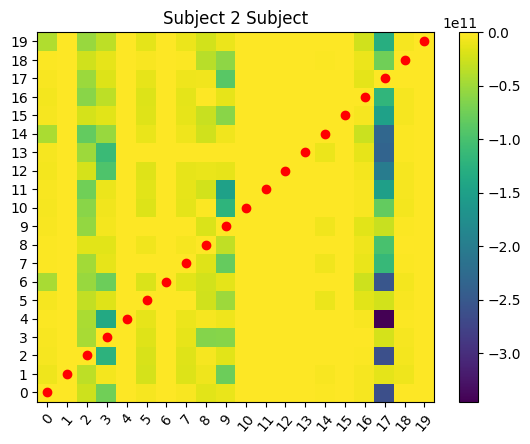

In [82]:
S = UrbanDat.HMMSimPipelineSubject2Subject(ncomp=[2,3,4,5,6,7,8,9,10], iter=20, stim=2)